# 03 - Model Training

This notebook:
- Loads preprocessed training & testing data
- Trains a machine learning model
- Evaluates baseline performance


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    f1_score, 
    roc_auc_score, 
    RocCurveDisplay
)

In [2]:
train_df = pd.read_csv("../data/processed/train_data.csv")
test_df = pd.read_csv("../data/processed/test_data.csv")


In [3]:
X_train = train_df.drop("approval", axis=1)
y_train = train_df["approval"]

X_test = test_df.drop("approval", axis=1)
y_test = test_df["approval"]


In [4]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = []
trained_models = {}

# Training loop
for name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)
    trained_models[name] = model
    
    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate Metrics
    results.append({
        "Model": name,
        "Accuracy": model.score(X_test, y_test),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    })

# Display comparison table
comparison_df = pd.DataFrame(results)
print("Model Comparison Results:")
print(comparison_df)

Model Comparison Results:
                 Model  Accuracy  F1-Score   ROC-AUC
0  Logistic Regression  0.909091  0.903226  0.907407
1        Random Forest  0.848485  0.838710  0.861111


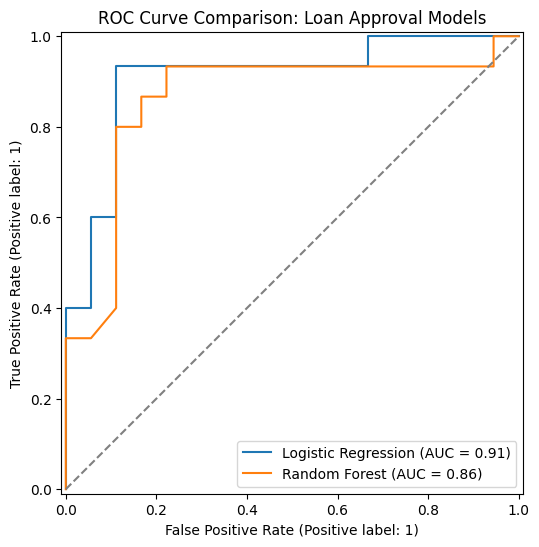

In [5]:
# Plot ROC Curves for both models
fig, ax = plt.subplots(figsize=(8, 6))

for name, model in trained_models.items():
    RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax, name=name)

plt.title("ROC Curve Comparison: Loan Approval Models")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray") # Baseline
plt.show()# Plot ROC Curves for both models

In [6]:
# Save models to results directory
joblib.dump(trained_models["Logistic Regression"], "../results/logistic_model.pkl")
joblib.dump(trained_models["Random Forest"], "../results/random_forest_model.pkl")

print("Models successfully saved to '../results/'")# Save models to results directory

Models successfully saved to '../results/'


* Metric Diversity: By including F1-Score (which balances precision and recall) and ROC-AUC (which measures classification quality across all thresholds), you are looking at the model's reliability in a way accuracy alone cannot capture.